In [1]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread
import rasterio as rio
from rasterio.plot import reshape_as_image
import maskslic as seg
import skimage.segmentation as seg2


In [2]:
c2 = '/media/jp/FreeAgent GoFlex Drive/TCC/MAIN.tif'
c2_lee = '/media/jp/FreeAgent GoFlex Drive/TCC/MAIN2.tif'
slic_dir = '/media/jp/FreeAgent GoFlex Drive/TCC/slic/'

In [2]:
def test(filepath, n_segments, enforce_connectivity, distance, spatial_weight, filename='file', max_iter=10, compactness=0.1):
    with rio.open(filepath) as src:
        image = src.read()
        image = reshape_as_image(image)

        # Remover valores iguais a 0 para evitar problemas
        zero_mask = (image == 0)
        random_numbers = np.random.rand(*image.shape)
        image[zero_mask] = random_numbers[zero_mask]
        print('antes do slic')
        print(type(max_iter))
        vv_slic = seg.slic(image, n_segments=n_segments, max_iter=max_iter, compactness=compactness, enforce_connectivity=True, distance=distance, spatial_weight=spatial_weight)
        print('antes do mark')
        image_with_bounds = seg2.mark_boundaries(image=image[:, :, 3]/np.max(image[:, :, 3]), label_img=vv_slic)
        print('depois do mark')
        plt.imshow(image_with_bounds)
        plt.imsave(filename+'.png', image_with_bounds)
        return vv_slic

Params: /media/jp/FreeAgent GoFlex Drive/TCC/MAIN.tif 100 False 0 0.1 MAIN_wishart_100_1_False
antes do slic
<class 'int'>
0
1
2
3
4
5
6
7
8
9
antes do mark
depois do mark
Params: /media/jp/FreeAgent GoFlex Drive/TCC/MAIN.tif 100 True 0 0.1 MAIN_wishart_100_1_True
antes do slic
<class 'int'>
0
1
2
3
4
5
6
7
8
9
antes do mark
depois do mark
Params: /media/jp/FreeAgent GoFlex Drive/TCC/MAIN.tif 100 False 0 1 MAIN_wishart_100_10_False
antes do slic
<class 'int'>
0
1
2
3
4
5
6
7
8
9
antes do mark
depois do mark
Params: /media/jp/FreeAgent GoFlex Drive/TCC/MAIN.tif 100 True 0 1 MAIN_wishart_100_10_True
antes do slic
<class 'int'>
0
1
2
3
4
5
6
7
8
9
antes do mark
depois do mark
Params: /media/jp/FreeAgent GoFlex Drive/TCC/MAIN.tif 100 False 0 5 MAIN_wishart_100_50_False
antes do slic
<class 'int'>
0
1
2
3
4
5
6
7
8
9
antes do mark
depois do mark
Params: /media/jp/FreeAgent GoFlex Drive/TCC/MAIN.tif 100 True 0 5 MAIN_wishart_100_50_True
antes do slic
<class 'int'>
0
1
2
3
4
5
6
7
8
9
antes d

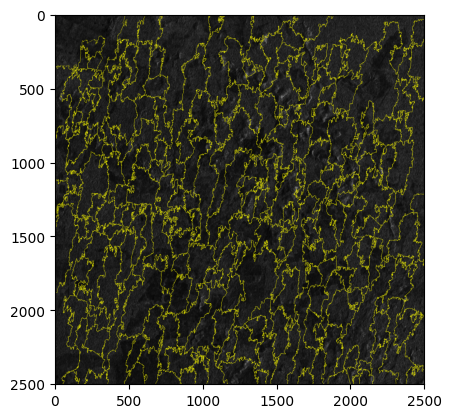

In [28]:
files = [c2, c2_lee]
distances = {0: 'wishart', 1: 'rw', 2: 'snll', 3: 'hlt'}
connectivity = [False, True]
n_segments = [100, 500, 1000]
spatial_weight = [0.1, 1, 5]

for file in files:
    for distance in distances.keys():
        for n in n_segments:
            for w in spatial_weight:
                for c in connectivity:
                    filename = file.split('/')[-1].replace('.tif','') + f'_{distances[distance]}_{n}_{str(int(w*10))}_{str(c)}'

                    print(f"Params: {file} {n} {c} {distance} {w} {filename}")
                    slic = test(file, n, c, distance, w, filename) 
                    np.save(slic_dir+filename+'.npy', slic)
 
                        #print(f'Erro na combinação {filename}')



In [29]:
file = '/home/jp/Downloads/C2_subset.tif'

antes do slic
<class 'int'>
0
1
2
3
4
5
6
7
8
9
antes do mark
depois do mark


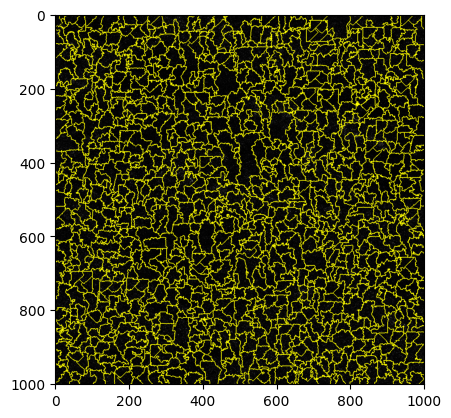

In [30]:
filename = 'C2_wishart_5000_5_true'
slic = test(file, 5000, True, 0, 5, filename) 

antes do slic
<class 'int'>
0
1
2
3
4
5
6
7
8
9
antes do mark
depois do mark


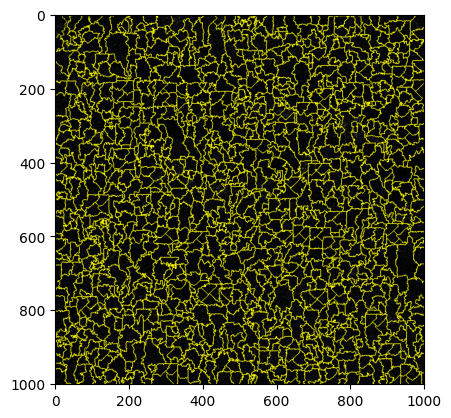

In [31]:
filename = 'C2_rw_5000_5_true'
slic = test(file, 5000, True, 1, 5, filename) 

antes do slic
<class 'int'>
0
1
2
3
4
5
6
7
8
9
antes do mark
depois do mark


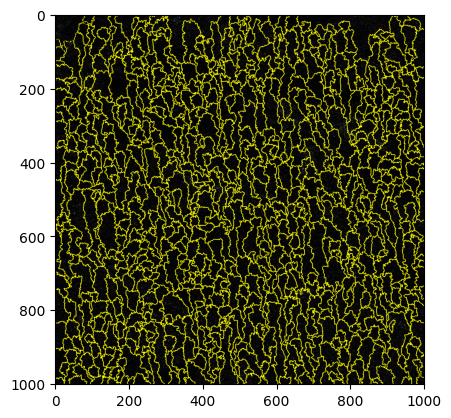

In [32]:
filename = 'C2_snll_5000_5_true'
slic = test(file, 5000, True, 2, 5, filename) 

antes do slic
<class 'int'>
0
1
2
3
4
5
6
7
8
9
antes do mark
depois do mark


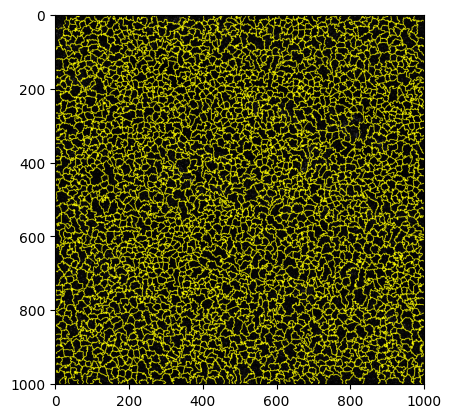

In [33]:
filename = 'C2_hlt_5000_5_true'
slic = test(file, 5000, True, 3, 5, filename) 

In [3]:
file = '/home/jp/Documents/IME/TCC/CODE/Capstone-Project/maskSLIC-master/data/chelsea.png'
filename = 'C2_wishart_5000_5_true'
slic = test(file, 5000, True, 0, 5, filename) 

/home/jp/.local/lib/python3.10/site-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


antes do slic
<class 'int'>


IndexError: tuple index out of range